In [1]:
#Lets import librariesss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from tensorflow import keras

In [2]:
#Load the dataset that you just downloaded
print("Loading California Housing Dataset..")
housing = fetch_california_housing(as_frame=True)
print(housing)
df = pd.concat([housing.data,housing.target],axis=1)
print("df:",df)

Loading California Housing Dataset..
{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.

In [3]:
#print and check
print(f"Dataset Shape: {df.shape}")
print(f" -Rows: {df.shape} samples")
print(f" -Columns: {df.shape} features + targets\n")
print(df.head())

Dataset Shape: (20640, 9)
 -Rows: (20640, 9) samples
 -Columns: (20640, 9) features + targets

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
#basic statistics
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [5]:
#check for missing values(very imppp this is)- half of my job ig
print("Missing values:")
print(df.isnull().sum())
print("No missing values detected, lets go")

Missing values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
No missing values detected, lets go


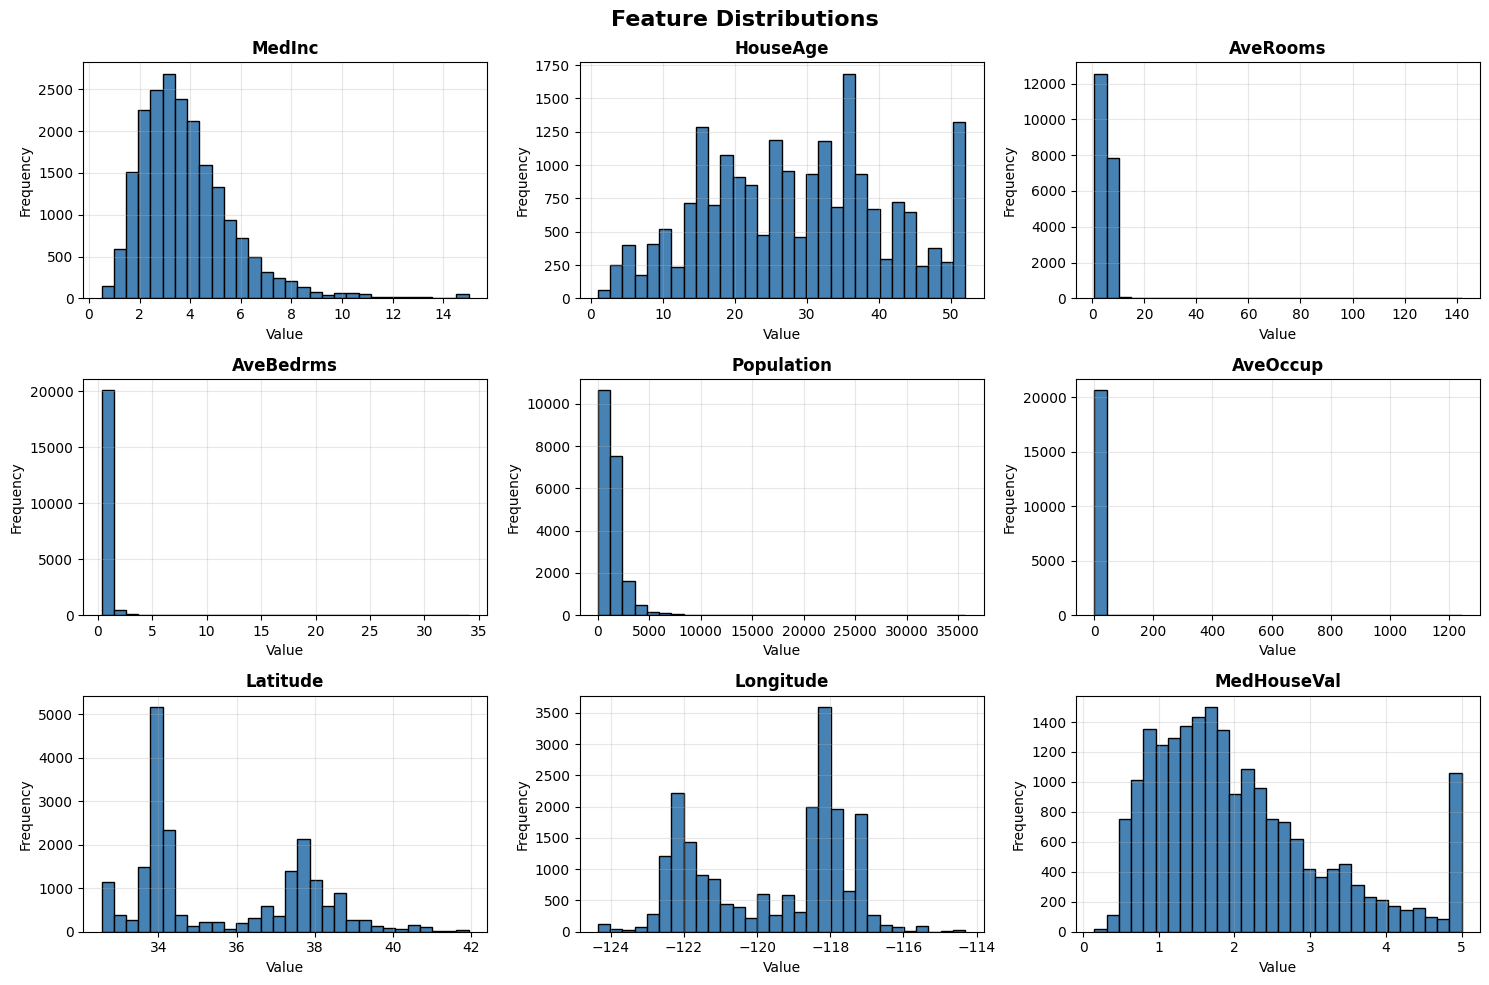

Distributions Visualised


In [6]:
#Visualise Distributions
fig, axes = plt.subplots(3,3, figsize = (15,10)) 
fig.suptitle("Feature Distributions", fontsize=16, fontweight="bold") #supertitle

for idx, col in enumerate(df.columns):
    ax = axes[idx // 3, idx % 3]    #rows,cols (more like quotient and reminder)
    ax.hist(df[col], bins = 30, edgecolor="black", color="steelblue")
    ax.set_title(col, fontweight="bold")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.grid(True, alpha=0.3) #alpha=transperency

plt.tight_layout()
plt.show()

print("Distributions Visualised")
    



In [7]:
#lets understand tensors 
x_example = np.array([[1,2,3],[4,5,6]])
print("Numpy Array (2D Tensor):")
print(x_example)
print(f"Type: {type(x_example)}")

x_tensor = tf.convert_to_tensor(x_example, dtype = tf.float32)
print("Tensorflow tensor(same data)")
print(x_tensor)
print(f"shape: {x_tensor.shape}")
print(f"type: {type(x_tensor)}")

#our data tensor 
print(f"Our House price data as tensor:")
x_all = df.drop("MedHouseVal",axis=1).values
print(f"   Features tensor shape: {x_all.shape}")
print(f"   - 20,640 houses (rows)")
print(f"   - 8 features (columns)")


Numpy Array (2D Tensor):
[[1 2 3]
 [4 5 6]]
Type: <class 'numpy.ndarray'>
Tensorflow tensor(same data)
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
shape: (2, 3)
type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Our House price data as tensor:
   Features tensor shape: (20640, 8)
   - 20,640 houses (rows)
   - 8 features (columns)


In [8]:
#train/validation/test split and normalisation 

x = df.drop("MedHouseVal", axis=1).values 
y = df["MedHouseVal"].values

print(f"Orginal dataset:")
print(f" x(Features): {x.shape}")
print(f"y(target): {y.shape}")
print(df["MedHouseVal"])

x_temp, x_test, y_temp, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print(f"Split1 (80-20):")
print(f" Temp (train+val): {x_temp.shape[0]} samples")
print(f" Test:             {x_test.shape[0]} samples")

#split2 - 75%train, 25%val
x_train,x_val,y_train,y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)
print(f"Training: {x_train.shape[0]} samples (60% of total)")
print(f"Validation: {x_val.shape[0]} samples (20% of total)")
print(f"Testing: {x_test.shape[0]} samples (20% of total)")

#Normalisation/Standardisation
print("Normalize data..")
print("Why Normalize?")

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

print("Before Normalisation:")
print(f" Min: {x_train.min():.2f}, Max{x_train.max():.2f}")
print(f"Mean: {x_train.mean():.2f}, Std{x_train.std():.2f}")
print("All features now standardized(mean~0, std~1)")



Orginal dataset:
 x(Features): (20640, 8)
y(target): (20640,)
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64
Split1 (80-20):
 Temp (train+val): 16512 samples
 Test:             4128 samples
Training: 12384 samples (60% of total)
Validation: 4128 samples (20% of total)
Testing: 4128 samples (20% of total)
Normalize data..
Why Normalize?
Before Normalisation:
 Min: -124.35, Max35682.00
Mean: 173.17, Std624.06
All features now standardized(mean~0, std~1)


In [9]:
#lets build neural network
print("Architecture")
print("Input layer: 8 features")
print("Hidden layer 1: 64 neurons(ReLU)")
print("Hidden layer 2: 32 neurons(ReLU)")
print("Hidden layer 3: 16 neurons(ReLU)")
print("Output layer: 1 neuron(Linear- for regression)")

model = keras.Sequential([
        layers.Input(shape=(8,)),
        layers.Dense(64, activation="relu", name="hidden_1"),
        layers.Dense(32, activation="relu", name="hidden_2"),
        layers.Dense(16, activation="relu", name="hidden_3"),
        layers.Dense(1,name="output")])

print("model created")
print("model summary")
model.summary()

model.compile(
    optimizer="adam",
    loss = "mse",
    metrics = ["mae"]
)

print("model compiled")
print("Optimizer: Adam")
print(" loss: Mse")
print("metric : Mean absolute error")              
                          


Architecture
Input layer: 8 features
Hidden layer 1: 64 neurons(ReLU)
Hidden layer 2: 32 neurons(ReLU)
Hidden layer 3: 16 neurons(ReLU)
Output layer: 1 neuron(Linear- for regression)
model created
model summary


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape              ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                  │ (None, 64)                │            576 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ hidden_2 (Dense)                  │ (None, 32)                │          2,080 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ hidden_3 (Dense)                  │ (None, 16)                │            528 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ output (Dense)                    │ (None, 1)                 │             17 │
└───────────────────────────────────┴───────────────────────────┴────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

model compiled
Optimizer: Adam
 loss: Mse
metric : Mean absolute error


In [10]:
#Train Model
print("Training Parameters:")
print("Epochs: 100(passes through entire dataset)")
print("Validation: check on validation set after each epoch")
print("Early stopping: Stop if validation loss doesnt improve")

history = model.fit(
    x_train_scaled, y_train, validation_data = (x_val_scaled, y_val),
    epochs= 100,
    batch_size = 32, #minibatch
    verbose=1,
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor="val_loss", 
            patience=15,
            restore_best_weights=True,
            verbose=1
        )
    ]
)
print("training completed")


Training Parameters:
Epochs: 100(passes through entire dataset)
Validation: check on validation set after each epoch
Early stopping: Stop if validation loss doesnt improve
Epoch 1/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.8458 - mae: 0.6276 - val_loss: 0.4244 - val_mae: 0.4647
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3995 - mae: 0.4500 - val_loss: 0.3747 - val_mae: 0.4399
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3695 - mae: 0.4310 - val_loss: 0.3714 - val_mae: 0.4322
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3524 - mae: 0.4205 - val_loss: 0.3481 - val_mae: 0.4234
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3401 - mae: 0.4107 - val_loss: 0.3547 - val_mae: 0.4098
Epoch 6/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3316 - mae: 0.4015 - val_loss: 0.3494 - val_mae: 0.4064
Epoch 7/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3170 - mae: 0.3940 - val_loss: 0.3381 - val_mae: 0.

In [22]:
#evaluate model
#get predictions
y_train_pred = model.predict(x_train_scaled, verbose = 0)
y_val_pred = model.predict(x_val_scaled, verbose=0)
y_test_pred = model.predict(x_test_scaled, verbose =0)

print("predictions generated")

#calculate metrics
def evaluate_set(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{'='*50}")
    print(f"{set_name} SET RESULTS")
    print(f"{'='*50}")
    print(f" MSE (Mean Squared Error): {mse:.6f}")
    print(f" RMSE(Root Mean sq error): {rmse:.6f}")
    print(f" MAE(Mean absolute Error): {mae:.6f}")
    print(f" Average Prediction error ${mae*100000:,.0f}")
    print(f" R(square) Score: {r2:.6f}")
    print(f"Model explains {r2*100:.2f}% of price variation")

    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R(square)": r2}

train_metrics = evaluate_set(y_train, y_train_pred, "TRAINING")
val_metrics = evaluate_set(y_val, y_val_pred,"VALIDATION")
test_metrics = evaluate_set(y_test,y_test_pred,"TEST")

print("Interpretation")
print(f" - On avg, predictions are off by ${test_metrics['MAE']*100000:,.0f}")
print(f" - Model explains {test_metrics['R(square)']*100:,.2f}% of house price variation")
if test_metrics["R(square)"] > 0.7:
    print("Model is performing well")
elif test_metrics["R(square)"] > 0.5:
    print("Model performance is moderate")
else:
    print("Model needs improvement")

predictions generated
TRAINING SET RESULTS
 MSE (Mean Squared Error): 0.227434
 RMSE(Root Mean sq error): 0.476900
 MAE(Mean absolute Error): 0.324108
 Average Prediction error $32,411
 R(square) Score: 0.828301
Model explains 82.83% of price variation
VALIDATION SET RESULTS
 MSE (Mean Squared Error): 0.271166
 RMSE(Root Mean sq error): 0.520736
 MAE(Mean absolute Error): 0.351850
 Average Prediction error $35,185
 R(square) Score: 0.802518
Model explains 80.25% of price variation
TEST SET RESULTS
 MSE (Mean Squared Error): 0.272254
 RMSE(Root Mean sq error): 0.521780
 MAE(Mean absolute Error): 0.351580
 Average Prediction error $35,158
 R(square) Score: 0.792237
Model explains 79.22% of price variation
Interpretation
 - On avg, predictions are off by $35,158
 - Model explains 79.22% of house price variation
Model is performing well


Training history plotted!!


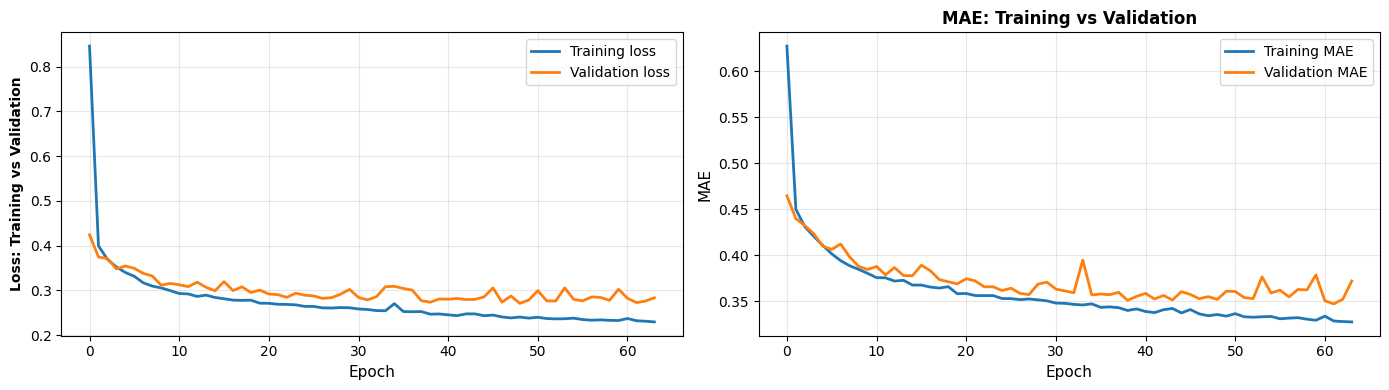

Residuals Plotted!!


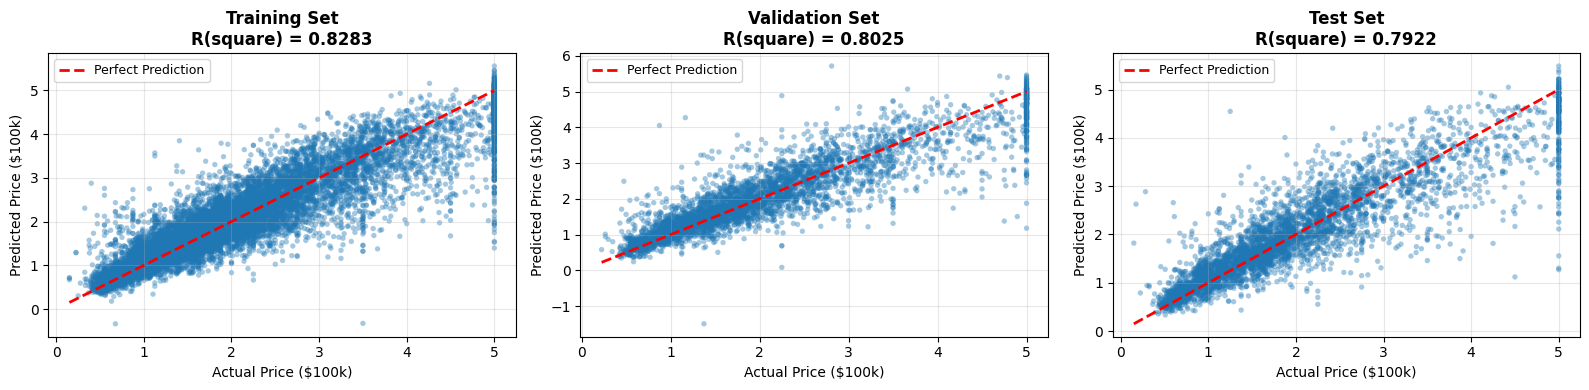

In [29]:
#visualisation
fig, axes = plt.subplots(1,2, figsize = (14,4))

axes[0].plot(history.history["loss"], label="Training loss", linewidth=2)
axes[0].plot(history.history["val_loss"], label="Validation loss", linewidth=2)
axes[0].set_xlabel("Epoch",fontsize=11)
axes[0].set_ylabel("Loss: Training vs Validation", fontweight="bold")
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history["mae"],label="Training MAE",linewidth=2)
axes[1].plot(history.history["val_mae"],label="Validation MAE",linewidth=2)
axes[1].set_xlabel("Epoch",fontsize=11)
axes[1].set_ylabel("MAE", fontsize=11)
axes[1].set_title("MAE: Training vs Validation", fontweight="bold")
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

print("Training history plotted!!")

plt.tight_layout()
plt.show()

fig,axes = plt.subplots(1,3,figsize=(16,4))

for idx, (y_true, y_pred, title) in enumerate([
    (y_train, y_train_pred, "Training Set"),
    (y_val, y_val_pred, "Validation Set"),
    (y_test, y_test_pred, "Test Set")
]):
    ax=axes[idx]
    ax.scatter(y_true, y_pred, alpha=0.4, s=15, edgecolors="none")

    #perfect prediction line 
    min_val, max_val = y_true.min(), y_true.max()
    ax.plot([min_val, max_val], [min_val, max_val], "r--", lw=2, label="Perfect Prediction")

    r2 = r2_score(y_true, y_pred)
    ax.set_xlabel("Actual Price ($100k)", fontsize = 10)
    ax.set_ylabel("Predicted Price ($100k)", fontsize = 10)
    ax.set_title(f"{title}\nR(square) = {r2:.4f}", fontweight="bold")
    ax.legend(fontsize = 9)
    ax.grid(True, alpha=0.3)

print("Residuals Plotted!!")
plt.tight_layout()
plt.show()



In [32]:
#lets try making predictions on new data

new_house = np.array([[
    8.0, 30.0, 6.5, 1.2, 300.0, 2.5, 37.75, -122.45 ]])

#scaling using same scaler from above
new_house_scaled = scaler.transform(new_house)

#prediction timeee
predicted_price = model.predict(new_house_scaled, verbose = 0)
predicted_price_dollars = predicted_price[0][0] * 100000

print("Predicting house price for:")
print(f" Median Income: $80,000")
print(f" House Age: 30 years")
print(f" Average Rooms: 6.5")
print(f" predicted price:${predicted_price_dollars:,.2f}")
print(f" (In model units: {predicted_price[0][0]:.4f} * $100,000)")

Predicting house price for:
 Median Income: $80,000
 House Age: 30 years
 Average Rooms: 6.5
 predicted price:$466,436.25
 (In model units: 4.6644 * $100,000)
